In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [ ]:
# read data from excel files
X_train = pd.read_excel('training_feature_matrix.xlsx', header = None)
X_test = pd.read_excel('test_feature_matrix.xlsx', header = None)
Y_train = pd.read_excel('training_output.xlsx', header = None)
Y_test = pd.read_excel('test_output.xlsx', header = None)

In [ ]:
# function to implement min-max normalization
def normalize(data):
    res = (data - data.min())/(data.max() - data.min())  #this applies to every column
    return res

In [ ]:
# initialize the parameters
def initialize_param(num_features):
    np.random.seed(42)
    theta = np.random.randn(num_features,1)
    b = np.zeros((1,1))
    
    return theta,b

In [ ]:
#cost function
def compute_cost(data,Y,theta,b):
    m = data.shape[0]
    hypo = np.dot(data,theta) + b - Y             #hypo = X*theta+b - Y
    cost_val = 0.5/m * (np.dot(hypo.T,hypo))      #cost = hypo.transpose * hypo
    return float(cost_val)

In [ ]:
# update the parameters
def update_param(data,Y,theta,b,learning_rate = 0.001):
    m = data.shape[0]
    hypo = np.dot(data,theta) + b - Y
    ones = np.ones(m)
    db = 1/m * (np.dot(ones,hypo))
    d_theta = 1/m * (np.dot(data.T,hypo))
    
    b = b - learning_rate * db
    theta = theta - learning_rate * d_theta
    
    return b,theta

In [ ]:
# linear regression model
def lin_reg(data,Y,learning_rate = 0.001,num_iter = 10000):
    cost_list = []
    theta_list = []
    b_list = []
    
    data_norm = normalize(data)
    Y_norm = normalize(Y)
    num_features = data.shape[1]
    theta,b = initialize_param(num_features)
    for i in range(num_iter):
        cost = compute_cost(data_norm,Y_norm,theta,b)
        b,theta = update_param(data_norm,Y_norm,theta,b,learning_rate)
        cost_list.append(cost)
        theta_list.append(theta)
        b_list.append(b)
        
    #plt.plot(iter_list,cost_list)
    
    return cost,theta,b,cost_list,theta_list,b_list

In [ ]:
#df_X = pd.DataFrame([[1,2],[3,4],[5,6]])
#df_Y = pd.DataFrame([[10],[20],[30]])
#print("X shape: ",df_X.shape)
#print("Y shape: ",df_Y.shape)

In [ ]:
#num_feat = df_X.shape[1]
#theta2,b2 = initialize_param(num_feat)
#print("theta: ",theta)
#print("b: ",b)

In [ ]:
#cost1 = cost(df_X,df_Y,theta2,b2)
#print(cost1)

In [ ]:
#b2,theta2 = update_param(df_X,df_Y,theta2,b2,learning_rate = 0.001)
#print("theta2: ",theta2)
#print("b2: ",b2)

In [ ]:
#costf,thetaf,bf,costl,thetal,bl = lin_reg(df_X,df_Y,learning_rate = 0.001,num_iter = 1000)

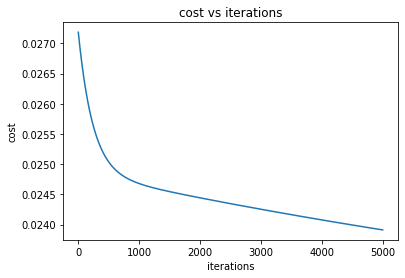

In [ ]:
# cost vs iterations
iterations = 5000
costf,thetaf,bf,costl,thetal,bl = lin_reg(X_train,Y_train,learning_rate = 0.001,num_iter = iterations)
iter_list = list(range(iterations))
plt.plot(iter_list,costl)
plt.title('cost vs iterations')
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

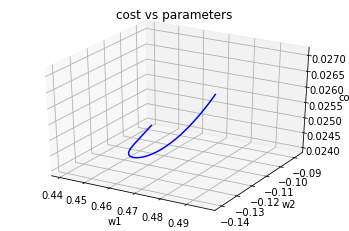

In [ ]:
# cost vs w1, w2
w1 = []
w2 = []
for i in range(iterations):
    w1.append(thetal[i][0])
    w2.append(thetal[i][1])
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot(w1,w2,costl,'blue')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('cost')
ax.set_title('cost vs parameters')
#fig.show()
plt.show()

In [ ]:
for i in range(thetaf.shape[0]):                              #y = b + w1*x1 + w2*x2
    print("theta"+str(i+1)+": ", thetaf[i])                   # w1,w2,b are final parameters obtained
print("b: ", bf)

theta1:  [0.44067258]
theta2:  [-0.08773265]
b:  [[-0.03539417]]


In [ ]:
# predict output values
def predict(test_data, final_theta, final_b):
    Y_pred = np.dot(test_data,final_theta) + final_b
    return Y_pred

In [ ]:
X_test_norm = normalize(X_test)
Y_predicted = pd.DataFrame(predict(X_test_norm, thetaf, bf))

In [ ]:
min_Y = Y_test.min()
max_Y = Y_test.max()
def denormalize(Y_pred, min_val, max_val):
    Y_denorm = Y_pred * (max_val - min_val) + min_val
    return Y_denorm
#print(min_Y)
#print(max_Y)

In [ ]:
Y_output = denormalize(Y_predicted, min_Y, max_Y)

In [ ]:
# mean square error
def mean_sqr_error(Y_pred, Y_test):
    error = (Y_test - Y_pred)**2
    mean_error = np.mean(error) 
    return float(mean_error)

In [ ]:
mean_sq_error = mean_sqr_error(Y_output,Y_test)
print("mean square error is: ",mean_sq_error)

mean square error is:  7.339726063966084
